<a href="https://colab.research.google.com/github/ZionOchayon/A-Synchronous-MA-Search-algorithm/blob/master/assignment_7_zion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student name ID and Mobile Phone

https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fforms.gle%2F1EgLcveXvqHcHPaL7


In [7]:
StudentName = 'Zion Ochayon'
StudentID = '313351942'
StudentMobile = '0525650698'

In [8]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# assignment

In [9]:
!pip install -U tensorflow_datasets

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
# tf.enable_eager_execution()

2.15.0


In [11]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [13]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Print the shapes of the loaded datasets
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [14]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

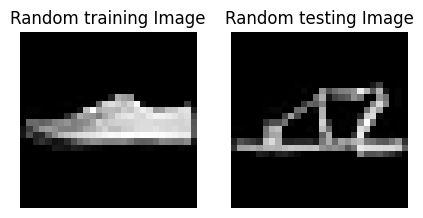

In [16]:
import matplotlib.pyplot as plt
import random

# Get a random index for the training and testing datasets
random_train_index = random.randint(0, len(train_images) - 1)
random_test_index = random.randint(0, len(test_images) - 1)

# Plot a random image from the training set
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_images[random_train_index], cmap='gray')
plt.title(f"Random training Image")
plt.axis('off')

# Plot a random image from the testing set
plt.subplot(1, 2, 2)
plt.imshow(test_images[random_test_index], cmap='gray')
plt.title(f"Random testing Image")
plt.axis('off')

plt.show()

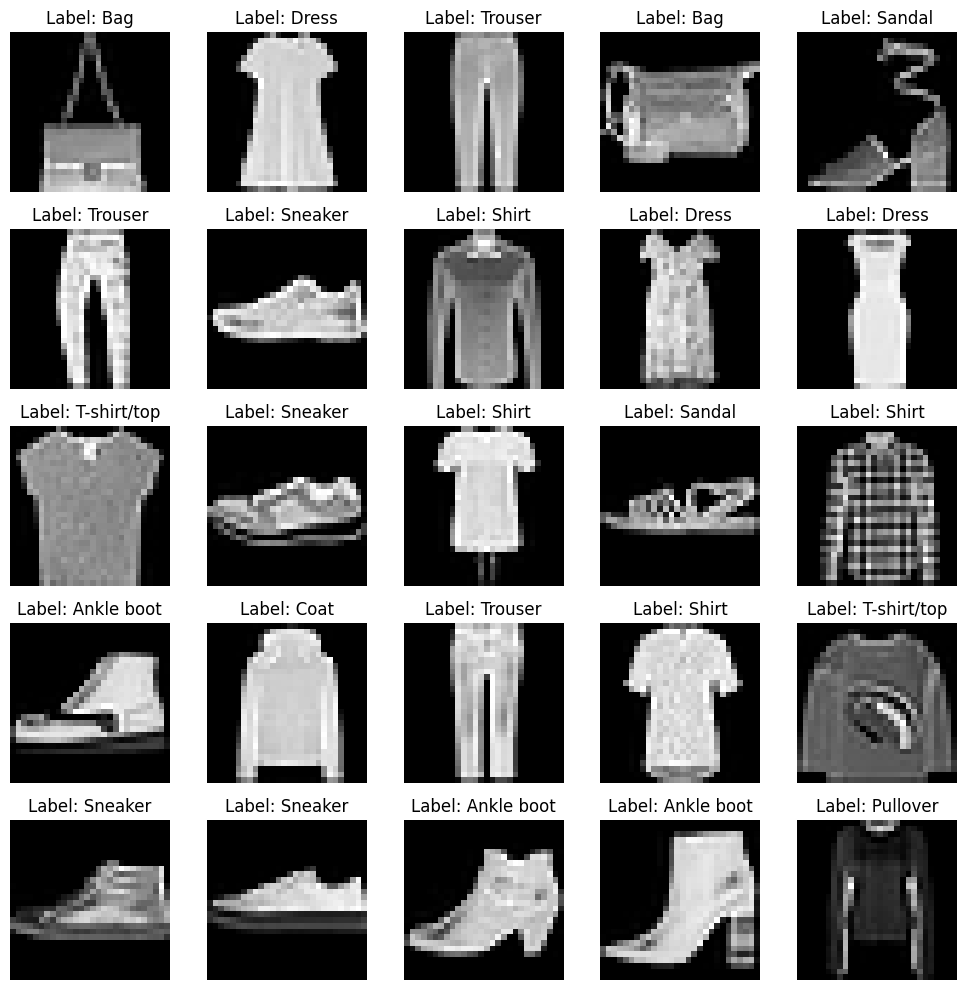

In [17]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a 5x5 grid of random images from the training set
plt.figure(figsize=(10, 10))
for i in range(5):
    for j in range(5):
        random_train_index = random.randint(0, len(train_images) - 1)
        plt.subplot(5, 5, i * 5 + j + 1)
        plt.imshow(train_images[random_train_index], cmap='gray')
        plt.title(f"Label: {class_names[train_labels[random_train_index]]}")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Build the neural network model
model = Sequential([
    # Flatten layer to convert input images to a 1D array
    Flatten(input_shape=(28, 28, 1)),

    # Dense layer with 128 units and ReLU activation function
    Dense(128, activation='relu'),

    # Output layer with 10 units (one for each class) and softmax activation function
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Train the model with 5 epochs and batch size 32
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.5048 - accuracy: 0.8239 - val_loss: 0.4300 - val_accuracy: 0.8532
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3783 - accuracy: 0.8647 - val_loss: 0.4016 - val_accuracy: 0.8549
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3386 - accuracy: 0.8770 - val_loss: 0.3589 - val_accuracy: 0.8696
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3140 - accuracy: 0.8848 - val_loss: 0.3492 - val_accuracy: 0.8733
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3440 - accuracy: 0.8750
Test accuracy: 87.50%


1/1 [==============================] - 0s 107ms/step


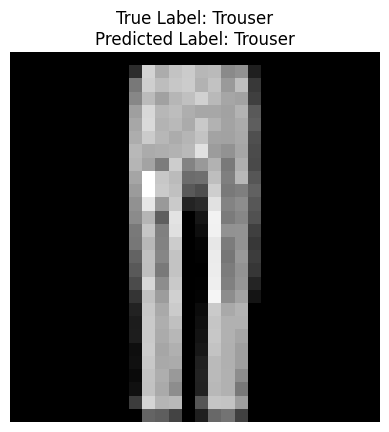

In [20]:
# Get a random index from the test dataset
random_test_index = random.randint(0, len(test_images) - 1)

# Get the corresponding image and label
random_test_image = test_images[random_test_index]
true_label = test_labels[random_test_index]

# Make a prediction on the random image
prediction = model.predict(np.expand_dims(random_test_image, axis=0))
predicted_label = np.argmax(prediction)

# Plot the random test image
plt.figure()
plt.imshow(random_test_image, cmap='gray')
plt.title(f"True Label: {class_names[true_label]}\nPredicted Label: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

In [21]:
# Get the first 1000 images and labels from the test dataset
num_images_to_predict = 1000
test_images_subset = test_images[:num_images_to_predict]
true_labels_subset = test_labels[:num_images_to_predict]

# Make predictions on the subset of images
predictions = model.predict(test_images_subset)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Count the number of correct and incorrect predictions
correct_predictions = np.sum(predicted_labels == true_labels_subset)
incorrect_predictions = num_images_to_predict - correct_predictions

print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")

32/32 [==============================] - 0s 2ms/step
Correct predictions: 883
Incorrect predictions: 117


#improved model

In [25]:
from tensorflow.keras.layers import Dropout

# Build the neural network model
model = Sequential([
    # Flatten layer to convert input images to a 1D array
    Flatten(input_shape=(28, 28, 1)),

    # Dense layer with 128 units and ReLU activation function
    Dense(128, activation='relu'),

    # dropout with a dropout rate of 0.5
    Dropout(0.2),

    # Dense layer with 64 units and ReLU activation function
    Dense(64, activation='relu'),

    # dropout with a dropout rate of 0.5
    Dropout(0.2),

    # Output layer with 10 units (one for each class) and softmax activation function
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

In [26]:
# Train the model with 5 epochs and batch size 32
history = model.fit(train_images, train_labels, epochs=15, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5757 - accuracy: 0.7945 - val_loss: 0.4393 - val_accuracy: 0.8396
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4284 - accuracy: 0.8447 - val_loss: 0.4103 - val_accuracy: 0.8502
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3895 - accuracy: 0.8573 - val_loss: 0.4121 - val_accuracy: 0.8486
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3680 - accuracy: 0.8658 - val_loss: 0.3733 - val_accuracy: 0.8614
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3533 - accuracy: 0.8716 - val_loss: 0.3539 - val_accuracy: 0.8745
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3451 - accuracy: 0.8744 - val_loss: 0.3444 - val_accuracy: 0.8735
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3317 - accuracy: 0.8775 - val_loss: 0.3427 - val_accur